<a href="https://colab.research.google.com/github/Ons-IT/Cyber-Threat-Classification-Using-Machine-Learning-Models/blob/main/Cyber_Threat_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛡️ Cyber Threat Classification Using Machine Learning Models


## 👥 Done by: Ons  
---

## 📌 Introduction

This project presents the design and implementation of an intelligent cyber threat detection using multiple machine learning models. The project aims to identify malicious network traffic and classify it as either benign (normal) or as one of several known cyberattack types.

We focus on two core classification tasks:

- **Binary Classification** — to determine whether a connection is normal or an attack  
- **Multi-Class Classification** — to identify the specific type of attack (e.g., ransomware, DDoS, scanning)

The rising complexity of cyber threats, especially in IoT and smart environments, makes automated threat detection essential. This study implements and compares six supervised learning models.

---

## 🤖 Machine Learning Models Used

- Decision Tree  
- Random Forest  
- Support Vector Machine (SVM)  
- Neural Network (MLPClassifier)  
- K-Nearest Neighbors (KNN)  
- Logistic Regression  

Each model is evaluated using:  
**Accuracy**, **Precision**, **Recall**, **F1-Score**, and **Confusion Matrix**.

---

## 📊 Dataset Overview

The dataset contains **211,043 connection records** and initially **44 features**. Each row corresponds to a single network session with structured attributes extracted from network traffic flows.

### 🔑 Feature Categories:

- **Network-level attributes**:  
  `duration`, `src_bytes`, `dst_bytes`, `proto`, `service`, `conn_state`, etc.

- **Application-layer attributes** (mostly sparse):  
  `http_method`, `dns_query`, `ssl_version`, `ssl_cipher`, etc.

- **Target Labels**:
  - `label` → Binary: 0 = Normal, 1 = Attack  
  - `type` → Attack type: e.g., scanning, backdoor, MITM, ransomware

---



🛠️ 1. Library Imports

In [ ]:
# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Preprocessing and Scaling
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve,
    classification_report
)

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical Operations
import numpy as np
import pandas as pd

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns



2. Data Loading

In [ ]:
file_id = '1WmQgYGfotrnQODYaNLwlO3OZAoUo6xD3'
url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url)

df.head()




,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


# 📊 3. Exploratory Data Analysis (EDA)

## 3.1 Dataset Overview and Sample Preview

In [ ]:
# Print dataset shape
print("Dataset Shape:", df.shape)

# Print column names
print("\nColumns:\n", df.columns.tolist())

# Show first 5 rows
df.head()


Dataset Shape: (211043, 44)

Columns:
 ['src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service', 'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query', 'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed', 'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth', 'http_method', 'http_uri', 'http_version', 'http_request_body_len', 'http_response_body_len', 'http_status_code', 'http_user_agent', 'http_orig_mime_types', 'http_resp_mime_types', 'weird_name', 'weird_addl', 'weird_notice', 'label', 'type']


,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


## 3.2 Check Data Types

In [ ]:
# Data types of all columns
df.dtypes


,0
src_ip,object
src_port,int64
dst_ip,object
dst_port,int64
proto,object
service,object
duration,float64
src_bytes,int64
dst_bytes,int64
conn_state,object


## 3.3 Handle Missing Values

In [ ]:
# Replace '-' with actual NaN
df.replace('-', np.nan, inplace=True)

# Check Missing Values
missing_values = df.isnull().sum()

# Show only columns with missing values
missing_values = missing_values[missing_values > 0]

# Display missing values
print(missing_values)


service                 132032
dns_query               176198
dns_AA                  176030
dns_RD                  176030
dns_RA                  176030
dns_rejected            176030
ssl_version             210642
ssl_cipher              210642
ssl_resumed             210642
ssl_established         210642
ssl_subject             211032
ssl_issuer              211032
http_trans_depth        210740
http_method             210756
http_uri                210756
http_version            210745
http_user_agent         210756
http_orig_mime_types    211027
http_resp_mime_types    210839
weird_name              210687
weird_addl              210886
weird_notice            210687
dtype: int64


## 3.4: Visualizing Missing Values

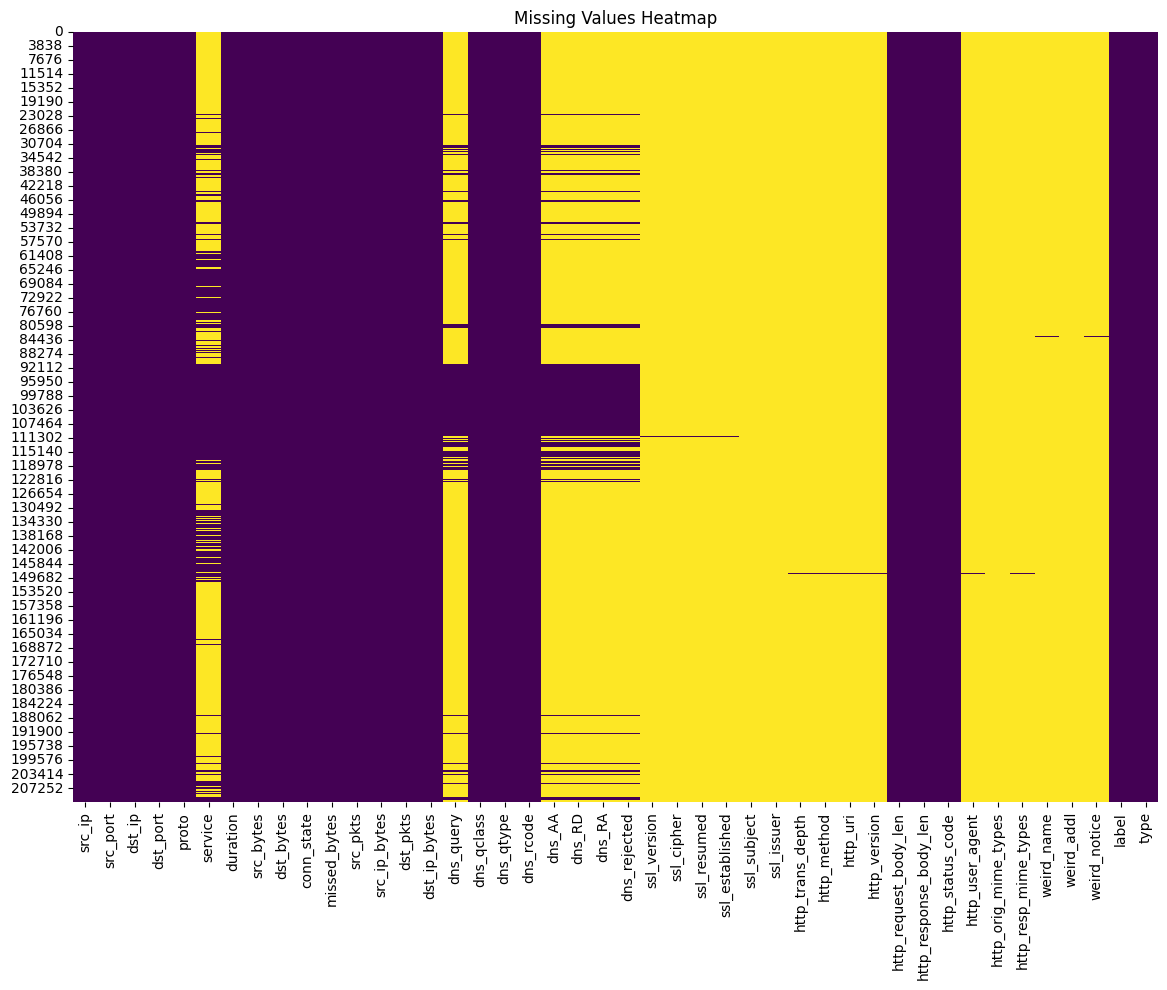

In [ ]:
# Visualize Missing Values with a Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


## 3.5	Target Label Distribution

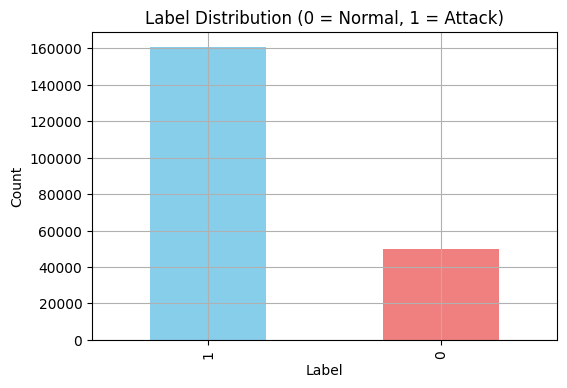

In [ ]:
# Analyze Target Variable (label) Distribution

plt.figure(figsize=(6,4))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Label Distribution (0 = Normal, 1 = Attack)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.grid(True)
plt.show()


## 3.6	Attack Type Distribution

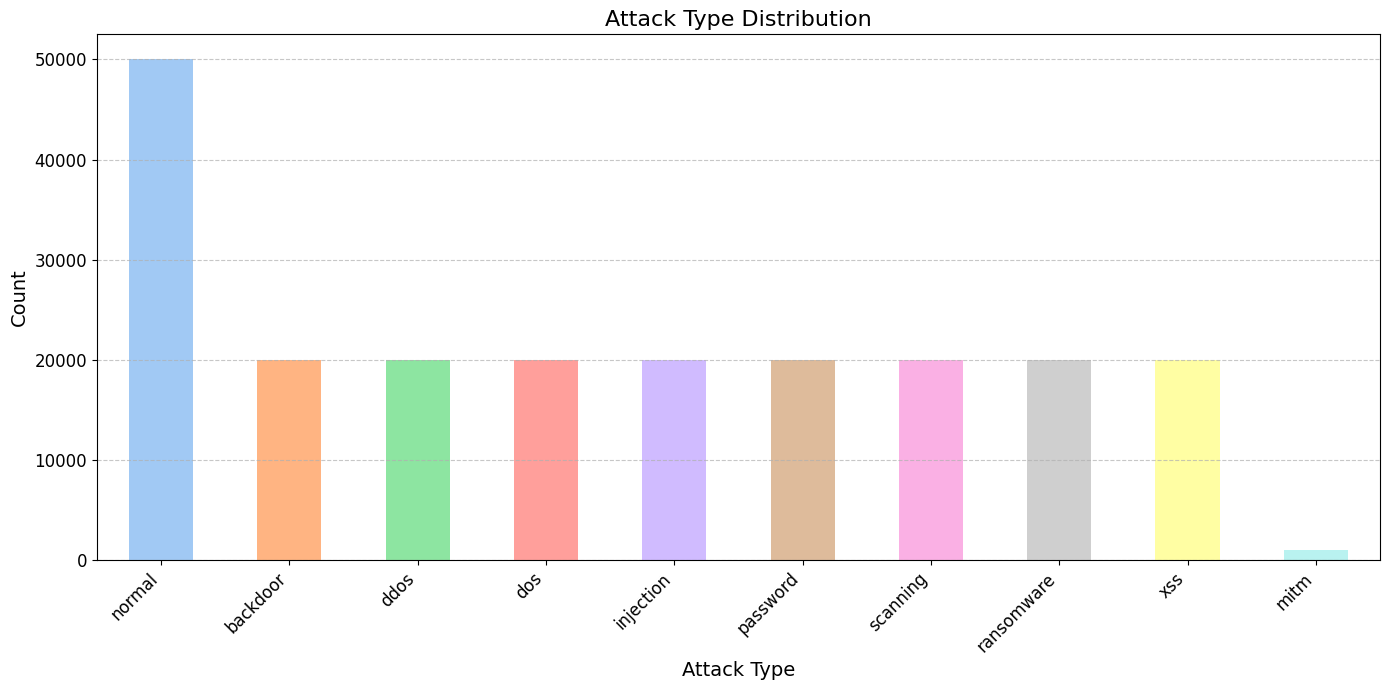

In [ ]:
# Analyze Attack Types

plt.figure(figsize=(14,7))
colors = sns.color_palette('pastel')

df['type'].value_counts().plot(kind='bar', color=colors)
plt.title('Attack Type Distribution', fontsize=16)
plt.xlabel('Attack Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3.7	Feature Correlation Heatmap

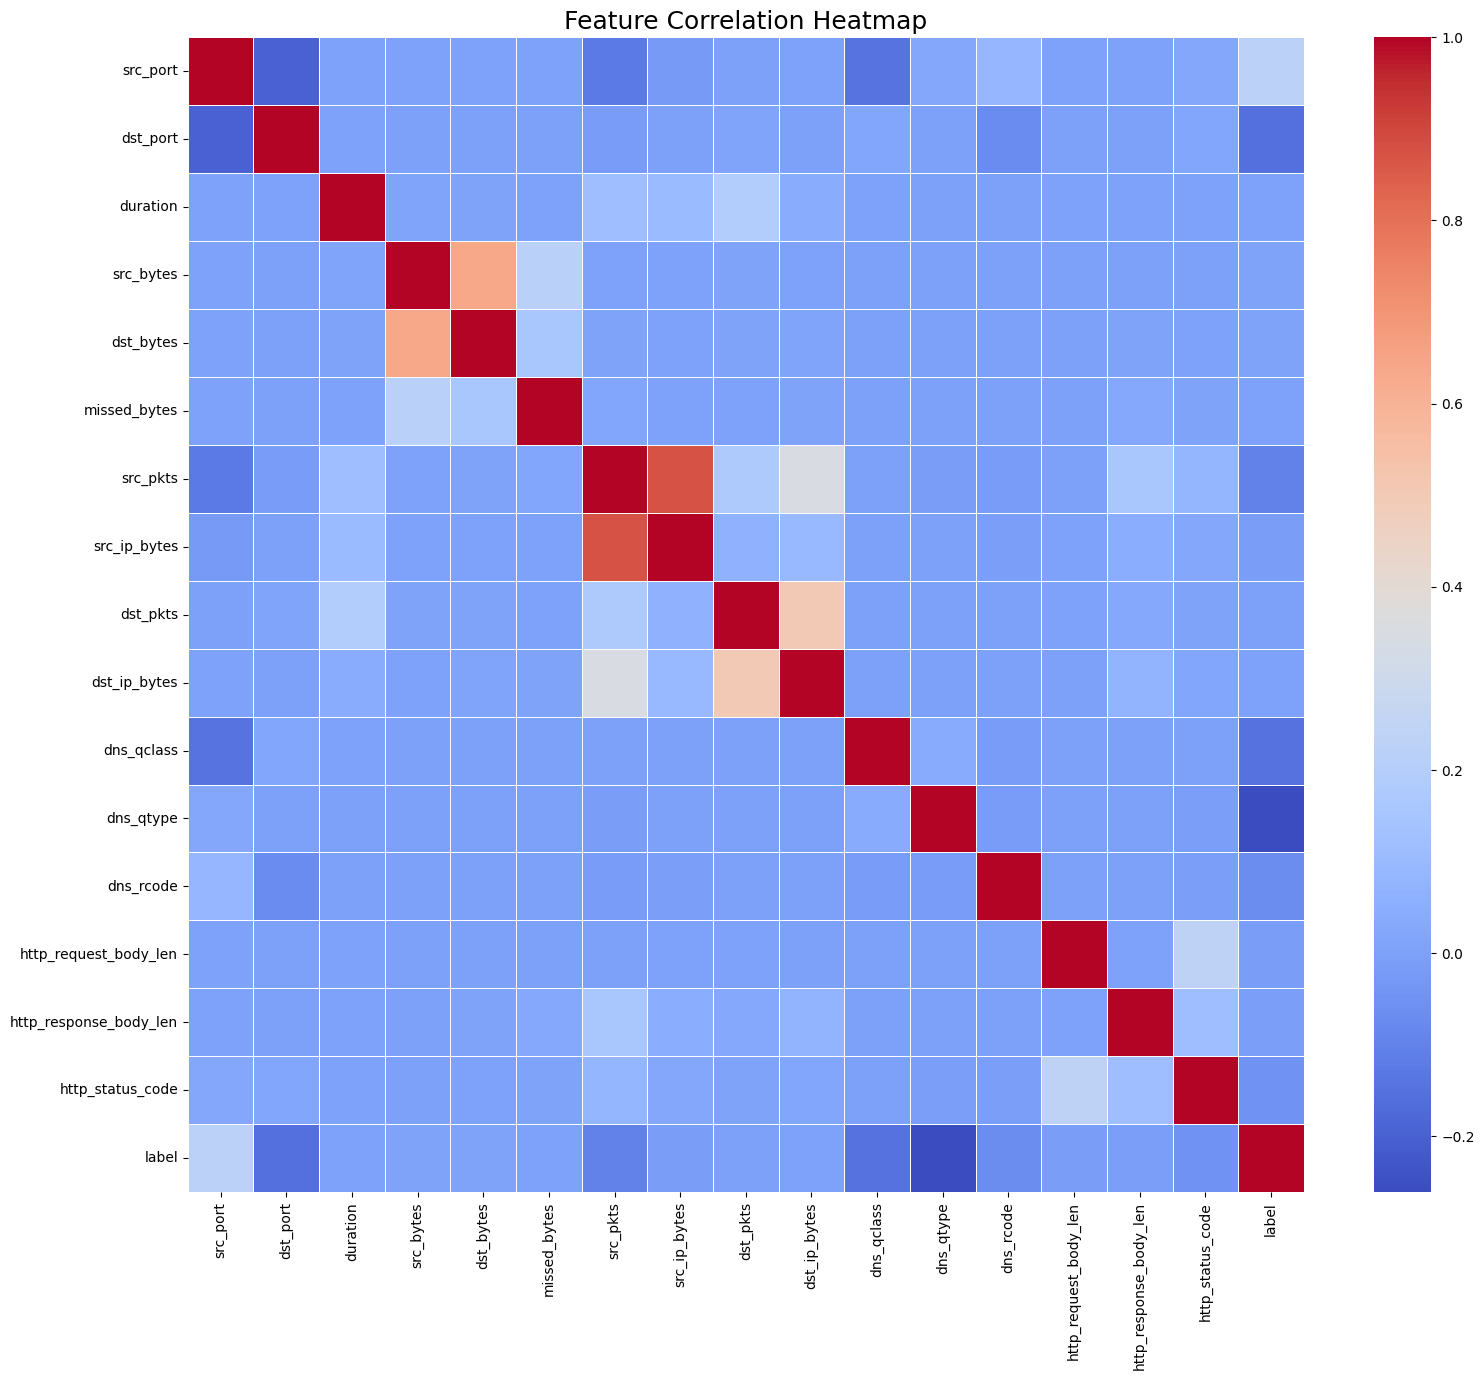

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(18,15))
corr = df.select_dtypes(include=[np.number]).corr()  # Only numeric features
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=18)
plt.show()


# 4: Data Preprocessing (Both Label and Attack Type)

## 4.1	Drop Sparse Columns (SSL, HTTP, Weird fields)

In [ ]:
# Drop sparse columns
cols_to_drop = [
    'ssl_version', 'ssl_cipher', 'ssl_resumed', 'ssl_established',
    'ssl_subject', 'ssl_issuer',
    'http_trans_depth', 'http_method', 'http_uri', 'http_version',
    'http_user_agent', 'http_orig_mime_types', 'http_resp_mime_types',
    'weird_name', 'weird_addl', 'weird_notice'
]

df.drop(columns=cols_to_drop, inplace=True)

print("Dropped sparse columns. New shape:", df.shape)


Dropped sparse columns. New shape: (211043, 28)


## 4.2 Fill Categorical NaNs

In [ ]:
# Fill missing categorical values with "Missing"
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    df[col].fillna('Missing', inplace=True)

print("Filled missing categorical values.")


Filled missing categorical values.


## 4.3 Drop IP Columns

In [ ]:
# Drop IP addresses
df.drop(['src_ip', 'dst_ip'], axis=1, inplace=True)

print("Dropped IP columns. New shape:", df.shape)


Dropped IP columns. New shape: (211043, 26)


## 4.4 Encode Categorical Columns


In [ ]:
# Label encode categorical features (except 'type')
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('type')  # Leave 'type' for now

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Encoded all categorical columns except 'type'.")


Encoded all categorical columns except 'type'.


## 4.5 Encode Attack Type (Target for Multi-class)

In [ ]:
# Count the frequency of each attack type
type_counts = df['type'].value_counts()

# Create a mapping dictionary: most frequent → 0, next → 1, ...
type_encoding_map = {label: idx for idx, label in enumerate(type_counts.index)}

# Apply the mapping to create a new encoded column
df['type_encoded'] = df['type'].map(type_encoding_map)

# Display the mapping
print("🔢 Attack Type Encoding (most to least frequent):")
for label, code in type_encoding_map.items():
    print(f"{code} → {label}")



🔢 Attack Type Encoding (most to least frequent):
0 → normal
1 → backdoor
2 → ddos
3 → dos
4 → injection
5 → password
6 → scanning
7 → ransomware
8 → xss
9 → mitm


## 4.6 Scale Numerical Features

In [ ]:
# Separate features and targets
X = df.drop(['label', 'type', 'type_encoded'], axis=1)
y_label = df['label']
y_type = df['type_encoded']

# Scale features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled features successfully.")


Scaled features successfully.


## 4.7 Train-Test Split for Both Tasks

In [ ]:
from sklearn.model_selection import train_test_split

# For Binary Classification (Label)
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(
    X_scaled, y_label, test_size=0.2, random_state=42, stratify=y_label)

# For Multi-class Classification (Type)
X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(
    X_scaled, y_type, test_size=0.2, random_state=42, stratify=y_type)

print("Completed Train-Test Split for both label and type prediction.")


Completed Train-Test Split for both label and type prediction.


# 🧠 Step 5: Model Training and Evaluation

## Step 5.1: Create Evaluation Function

In [ ]:
# Step 5.1 —  Evaluation Function

def evaluate_model(model, X_test, y_test, task_name="Classification Task"):
    from sklearn.metrics import confusion_matrix

    y_pred = model.predict(X_test)

    print(f"\n📊 Results for {model.__class__.__name__} ({task_name})")
    print("-" * 60)
    print("✅ Accuracy :", accuracy_score(y_test, y_pred))
    print("✅ Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("✅ Recall   :", recall_score(y_test, y_pred, average='weighted'))
    print("✅ F1 Score :", f1_score(y_test, y_pred, average='weighted'))


    print("Sanity check: # misclassified =", np.sum(y_pred != y_test))

    # Text Report
    print("\nClassification Report:\n")
    print(classification_report(
        y_test,
        y_pred,
        labels=[0, 1],
        target_names=["Normal", "Attack"],
        zero_division=0,
        digits=6
    ))


    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f"Confusion Matrix: {model.__class__.__name__}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("=" * 60)


## Step 5.2: Train & Evaluate All 6 Models for Label Prediction


📊 Results for DecisionTreeClassifier (Label Prediction)
------------------------------------------------------------
✅ Accuracy : 0.9988628017721339
✅ Precision: 0.9988628017721339
✅ Recall   : 0.9988628017721339
✅ F1 Score : 0.9988628017721339
Sanity check: # misclassified = 48

Classification Report:

              precision    recall  f1-score   support

      Normal   0.997600  0.997600  0.997600     10000
      Attack   0.999255  0.999255  0.999255     32209

    accuracy                       0.998863     42209
   macro avg   0.998427  0.998427  0.998427     42209
weighted avg   0.998863  0.998863  0.998863     42209



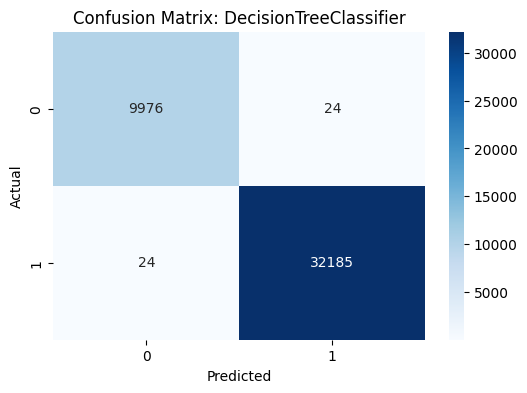

In [ ]:
# Step 5.2 — Train & Evaluate 6 Models for Label Prediction

## 5.2.1 Decision Tree
dt_label = DecisionTreeClassifier(random_state=42)
dt_label.fit(X_train_label, y_train_label)
evaluate_model(dt_label, X_test_label, y_test_label, task_name="Label Prediction")



📊 Results for LinearSVC (Label Prediction (Linear SVM))
------------------------------------------------------------
✅ Accuracy : 0.9132412518657158
✅ Precision: 0.913150263557655
✅ Recall   : 0.9132412518657158
✅ F1 Score : 0.9090869659737254
Sanity check: # misclassified = 3662

Classification Report:

              precision    recall  f1-score   support

      Normal   0.911879  0.701600  0.793037     10000
      Attack   0.913545  0.978950  0.945117     32209

    accuracy                       0.913241     42209
   macro avg   0.912712  0.840275  0.869077     42209
weighted avg   0.913150  0.913241  0.909087     42209



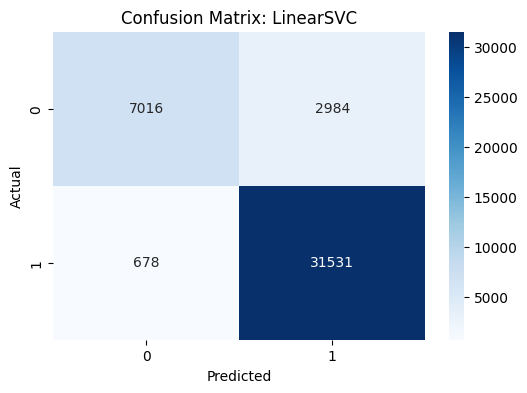

In [ ]:
# 5.2.3 Linear SVM
from sklearn.svm import LinearSVC

svm_label = LinearSVC(random_state=42, max_iter=10000)
svm_label.fit(X_train_label, y_train_label)
evaluate_model(svm_label, X_test_label, y_test_label, task_name="Label Prediction (Linear SVM)")



📊 Results for RandomForestClassifier (Label Prediction)
------------------------------------------------------------
✅ Accuracy : 0.9992655594778365
✅ Precision: 0.999265528401024
✅ Recall   : 0.9992655594778365
✅ F1 Score : 0.9992653693447874
Sanity check: # misclassified = 31

Classification Report:

              precision    recall  f1-score   support

      Normal   0.999199  0.997700  0.998449     10000
      Attack   0.999286  0.999752  0.999519     32209

    accuracy                       0.999266     42209
   macro avg   0.999243  0.998726  0.998984     42209
weighted avg   0.999266  0.999266  0.999265     42209



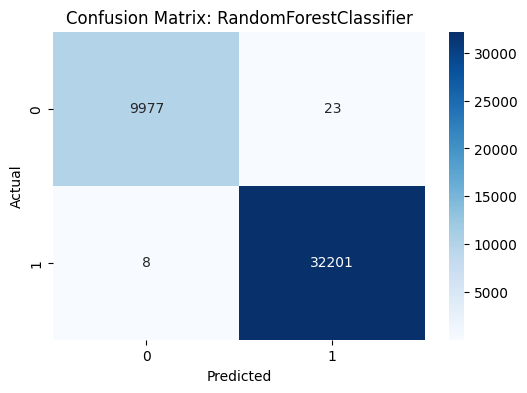

In [ ]:
## 5.2.2 Random Forest
rf_label = RandomForestClassifier(random_state=42)
rf_label.fit(X_train_label, y_train_label)
evaluate_model(rf_label, X_test_label, y_test_label, task_name="Label Prediction")


📊 Results for MLPClassifier (Label Prediction)
------------------------------------------------------------
✅ Accuracy : 0.9929872775948257
✅ Precision: 0.9929777189349362
✅ Recall   : 0.9929872775948257
✅ F1 Score : 0.992978279179038
Sanity check: # misclassified = 296

Classification Report:

              precision    recall  f1-score   support

      Normal   0.988817  0.981500  0.985145     10000
      Attack   0.994269  0.996554  0.995410     32209

    accuracy                       0.992987     42209
   macro avg   0.991543  0.989027  0.990278     42209
weighted avg   0.992978  0.992987  0.992978     42209



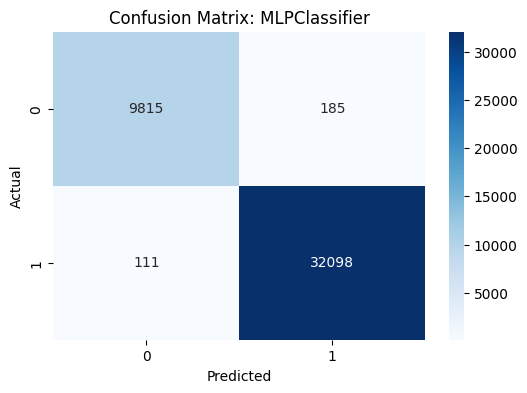

In [ ]:

## 5.2.4 Neural Network (MLP)
mlp_label = MLPClassifier(max_iter=300, random_state=42)
mlp_label.fit(X_train_label, y_train_label)
evaluate_model(mlp_label, X_test_label, y_test_label, task_name="Label Prediction")



📊 Results for KNeighborsClassifier (Label Prediction)
------------------------------------------------------------
✅ Accuracy : 0.9960198062024687
✅ Precision: 0.9960167729189391
✅ Recall   : 0.9960198062024687
✅ F1 Score : 0.9960170530051184
Sanity check: # misclassified = 168

Classification Report:

              precision    recall  f1-score   support

      Normal   0.993574  0.989600  0.991583     10000
      Attack   0.996775  0.998013  0.997394     32209

    accuracy                       0.996020     42209
   macro avg   0.995175  0.993806  0.994488     42209
weighted avg   0.996017  0.996020  0.996017     42209



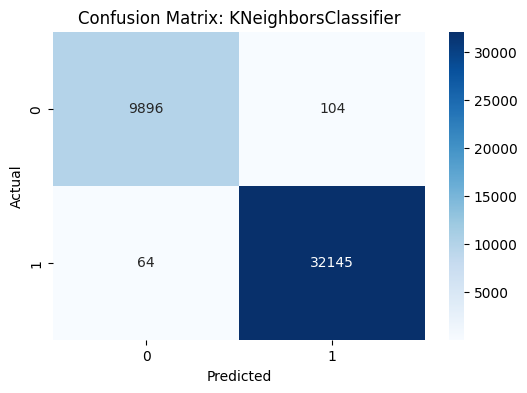

In [ ]:

## 5.2.5 K-Nearest Neighbors (KNN)
knn_label = KNeighborsClassifier()
knn_label.fit(X_train_label, y_train_label)
evaluate_model(knn_label, X_test_label, y_test_label, task_name="Label Prediction")



📊 Results for LogisticRegression (Label Prediction)
------------------------------------------------------------
✅ Accuracy : 0.9129806439384965
✅ Precision: 0.9129995553925935
✅ Recall   : 0.9129806439384965
✅ F1 Score : 0.9087297781004808
Sanity check: # misclassified = 3673

Classification Report:

              precision    recall  f1-score   support

      Normal   0.913259  0.699100  0.791957     10000
      Attack   0.912919  0.979385  0.944984     32209

    accuracy                       0.912981     42209
   macro avg   0.913089  0.839242  0.868471     42209
weighted avg   0.913000  0.912981  0.908730     42209



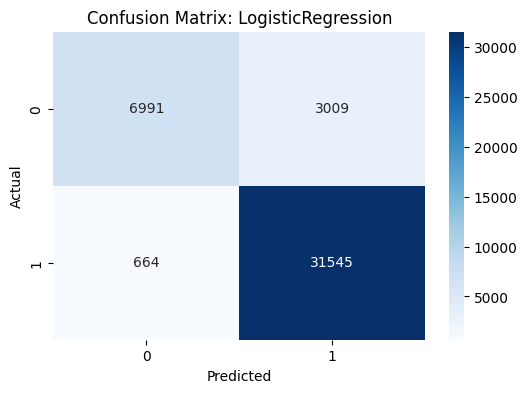

In [ ]:

## 5.2.6 Logistic Regression
lr_label = LogisticRegression(max_iter=300, random_state=42)
lr_label.fit(X_train_label, y_train_label)
evaluate_model(lr_label, X_test_label, y_test_label, task_name="Label Prediction")

### 📊 Step 5.3 — Train & Evaluate Models for Attack Type Prediction (Multi-Class)



📊 Results for DecisionTreeClassifier (Attack Type Prediction (Decision Tree))
------------------------------------------------------------
✅ Accuracy : 0.9881304934966476
✅ Precision: 0.9880461448843199
✅ Recall   : 0.9881304934966476
✅ F1 Score : 0.9880794768590695
Sanity check: # misclassified = 501

Classification Report:

              precision    recall  f1-score   support

      Normal   0.998498  0.997000  0.997748     10000
      Attack   0.999750  0.999500  0.999625      4000

   micro avg   0.998856  0.997714  0.998285     14000
   macro avg   0.999124  0.998250  0.998687     14000
weighted avg   0.998856  0.997714  0.998284     14000



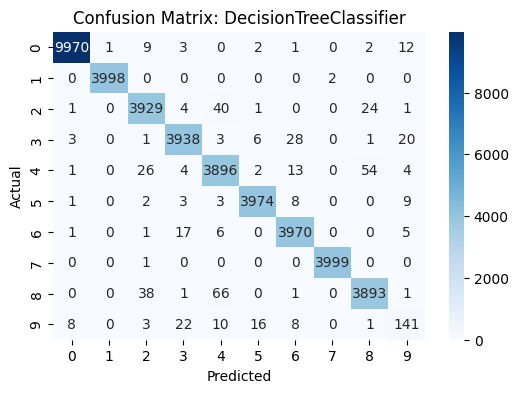

In [ ]:
# 📊 Step 5.3 — Train & Evaluate Models for Attack Type Prediction (Multi-Class)

## 5.3.1 Decision Tree
dt_type = DecisionTreeClassifier(random_state=42)
dt_type.fit(X_train_type, y_train_type)
evaluate_model(dt_type, X_test_type, y_test_type, task_name="Attack Type Prediction (Decision Tree)")



📊 Results for RandomForestClassifier (Attack Type Prediction (Random Forest))
------------------------------------------------------------
✅ Accuracy : 0.990310123433391
✅ Precision: 0.9903882387054461
✅ Recall   : 0.990310123433391
✅ F1 Score : 0.9903425245010312
Sanity check: # misclassified = 409

Classification Report:

              precision    recall  f1-score   support

      Normal   0.998599  0.998100  0.998350     10000
      Attack   1.000000  0.999500  0.999750      4000

   micro avg   0.998999  0.998500  0.998750     14000
   macro avg   0.999300  0.998800  0.999050     14000
weighted avg   0.998999  0.998500  0.998750     14000



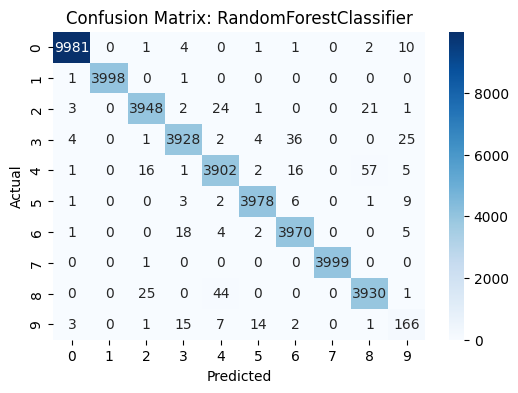

In [ ]:
## 5.3.2 Random Forest
rf_type = RandomForestClassifier(random_state=42)
rf_type.fit(X_train_type, y_train_type)
evaluate_model(rf_type, X_test_type, y_test_type, task_name="Attack Type Prediction (Random Forest)")



📊 Results for LinearSVC (Attack Type Prediction (Linear SVM))
------------------------------------------------------------
✅ Accuracy : 0.6595986637920822
✅ Precision: 0.6354918050666238
✅ Recall   : 0.6595986637920822
✅ F1 Score : 0.6229836623446201
Sanity check: # misclassified = 14368

Classification Report:

              precision    recall  f1-score   support

      Normal   0.911840  0.895700  0.903698     10000
      Attack   0.547655  0.989750  0.705138      4000

   micro avg   0.757448  0.922571  0.831895     14000
   macro avg   0.729747  0.942725  0.804418     14000
weighted avg   0.807787  0.922571  0.846967     14000



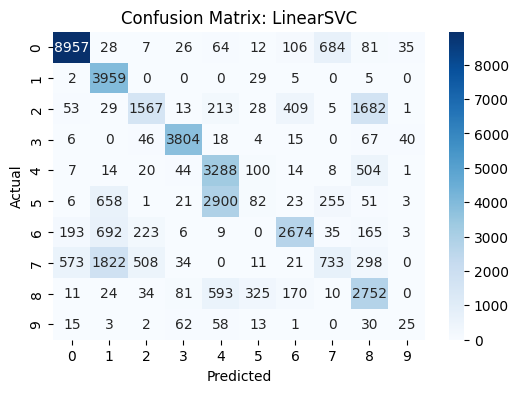

In [ ]:
## 5.3.3 Linear SVM
from sklearn.svm import LinearSVC
svm_type = LinearSVC(random_state=42, max_iter=10000)
svm_type.fit(X_train_type, y_train_type)
evaluate_model(svm_type, X_test_type, y_test_type, task_name="Attack Type Prediction (Linear SVM)")


📊 Results for MLPClassifier (Attack Type Prediction (MLPClassifier))
------------------------------------------------------------
✅ Accuracy : 0.9008031462484304
✅ Precision: 0.9025074450033077
✅ Recall   : 0.9008031462484304
✅ F1 Score : 0.9010580467982099
Sanity check: # misclassified = 4187

Classification Report:

              precision    recall  f1-score   support

      Normal   0.989239  0.983600  0.986411     10000
      Attack   0.977228  0.997750  0.987382      4000

   micro avg   0.985742  0.987643  0.986691     14000
   macro avg   0.983233  0.990675  0.986897     14000
weighted avg   0.985807  0.987643  0.986689     14000



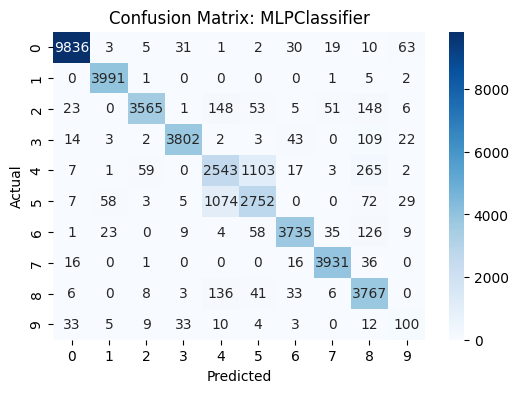

In [ ]:
## 5.3.4 Neural Network (MLP)
mlp_type = MLPClassifier(max_iter=300, random_state=42)
mlp_type.fit(X_train_type, y_train_type)
evaluate_model(mlp_type, X_test_type, y_test_type, task_name="Attack Type Prediction (MLPClassifier)")


📊 Results for KNeighborsClassifier (Attack Type Prediction (KNN))
------------------------------------------------------------
✅ Accuracy : 0.9380937714705394
✅ Precision: 0.9381164091133292
✅ Recall   : 0.9380937714705394
✅ F1 Score : 0.9379918083965583
Sanity check: # misclassified = 2613

Classification Report:

              precision    recall  f1-score   support

      Normal   0.990807  0.991600  0.991204     10000
      Attack   0.998250  0.998000  0.998125      4000

   micro avg   0.992932  0.993429  0.993180     14000
   macro avg   0.994528  0.994800  0.994664     14000
weighted avg   0.992934  0.993429  0.993181     14000



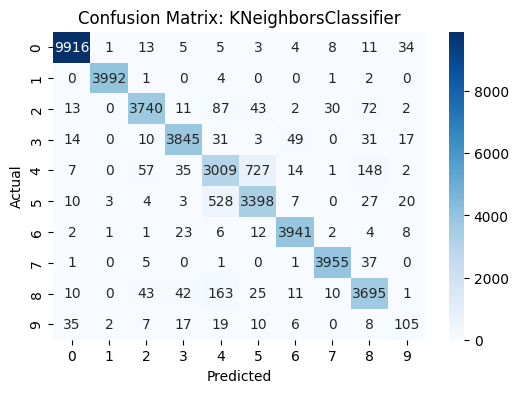

In [ ]:
## 5.3.5 K-Nearest Neighbors (KNN)
knn_type = KNeighborsClassifier()
knn_type.fit(X_train_type, y_train_type)
evaluate_model(knn_type, X_test_type, y_test_type, task_name="Attack Type Prediction (KNN)")


📊 Results for LogisticRegression (Attack Type Prediction (Logistic Regression))
------------------------------------------------------------
✅ Accuracy : 0.6891658177166007
✅ Precision: 0.6601758153619234
✅ Recall   : 0.6891658177166007
✅ F1 Score : 0.6661763246766955
Sanity check: # misclassified = 13120

Classification Report:

              precision    recall  f1-score   support

      Normal   0.917048  0.901000  0.908953     10000
      Attack   0.654380  0.989750  0.787861      4000

   micro avg   0.816945  0.926357  0.868218     14000
   macro avg   0.785714  0.945375  0.848407     14000
weighted avg   0.842000  0.926357  0.874355     14000



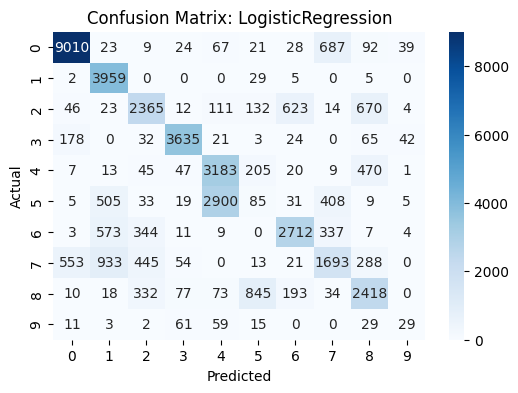

In [ ]:
## 5.3.6 Logistic Regression
lr_type = LogisticRegression(max_iter=300, random_state=42)
lr_type.fit(X_train_type, y_train_type)
evaluate_model(lr_type, X_test_type, y_test_type, task_name="Attack Type Prediction (Logistic Regression)")

## 5.4.1 Summary Table

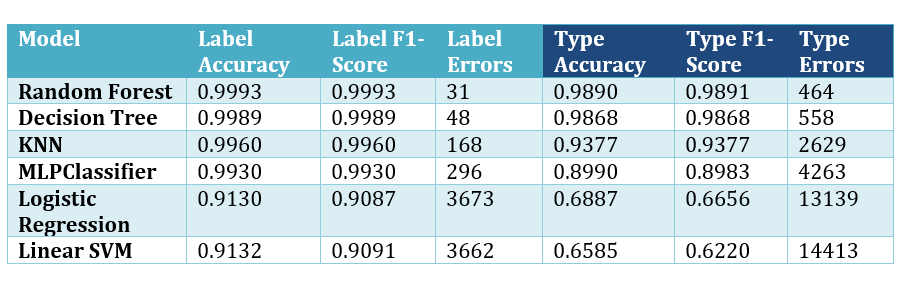


### 🔍 Summary Insight:

> Random Forest achieved the best performance in both binary and multi-class classification, with the highest accuracy and the fewest misclassifications.  
Tree-based models (Random Forest, Decision Tree) consistently outperformed others, while linear models (SVM, Logistic Regression) struggled with multi-class complexity.  
KNN and MLP provided competitive results and are suitable alternatives.


# Step 6 — Exporting the Best Model with joblib

In [ ]:
import joblib

# Train the best model (if not already)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_label, y_train_label)

# Export to file
joblib.dump(best_model, 'best_random_forest_model.pkl')


# Step 7 — Saving Preprocessed Data

In [ ]:
# Save cleaned DataFrame (with 'type_encoded' column)
df.to_csv("cleaned_dataset_with_type_encoded.csv", index=False)

# Save preprocessed NumPy arrays
np.save("X_scaled.npy", X_scaled)
np.save("y_label.npy", y_label)
np.save("y_type.npy", y_type)
